<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
X, y = make_moons(n_samples=500, noise=0.10, random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

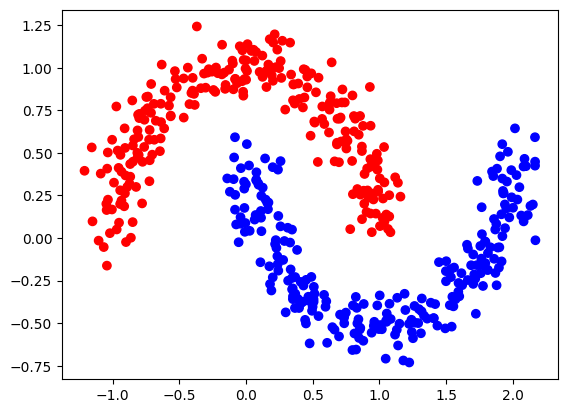

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap = 'bwr_r')

In [ ]:
class ANN(nn.Module):
  def __init__(self):
    super().__init__()

    self.l1 = nn.Linear(2, 3)
    self.l2 = nn.Linear(3, 1)

  def forward(self, X):
    out = self.l1(X)
    out = torch.tanh(out)
    out = self.l2(out)
    out = torch.sigmoid(out)
    return out


In [ ]:
model = ANN()

params= list(model.parameters())
n1_w = params[0].data[0]
n1_b = params[1].data[0]

n2_w = params[0].data[1]
n2_b = params[1].data[1]

n3_w = params[0].data[2]
n3_b = params[1].data[2]

n4_w = params[2].data[0]
n4_b = params[3].data

In [ ]:

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

for i in range(3000):
  y_hat = model(X_train)
  loss = criterion(y_hat, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i%100 == 0:
    print(loss.item())

0.7284397482872009
0.2548369765281677
0.25165510177612305
0.25009310245513916
0.24886147677898407
0.24739879369735718
0.24486900866031647
0.23588865995407104
0.06361372768878937
0.02773892693221569
0.01724948361515999
0.012408795766532421
0.009655586443841457
0.00788889080286026
0.006662676110863686
0.0057633742690086365
0.005076391622424126
0.004534867126494646
0.004097240511327982
0.003736355574801564
0.0034337148535996675
0.003176330355927348
0.0029547843150794506
0.0027620901819318533
0.002592978533357382
0.002443377859890461
0.0023100983817130327
0.002190608298406005
0.002082879189401865
0.0019852544646710157


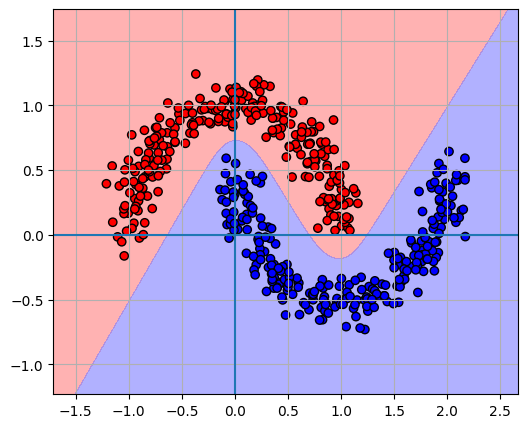

In [ ]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

with torch.no_grad():
  grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])
  Z = model(grid)
  Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

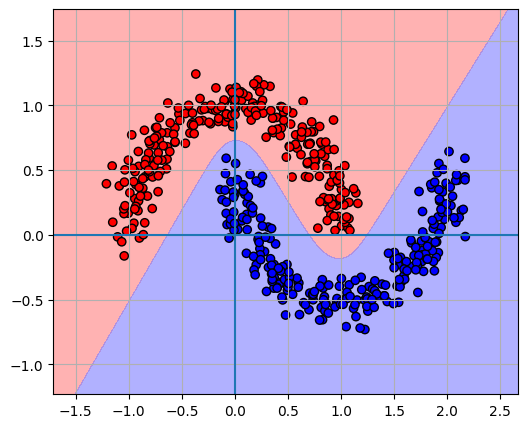

In [ ]:
def neuron(X):
    z1 = X @ n1_w.T + n1_b
    o1 = torch.tanh(z1).reshape(-1,1)

    z2 = X @ n2_w.T + n2_b
    o2 = torch.tanh(z2).reshape(-1,1)


    z3 = X @ n3_w.T + n3_b
    o3 = torch.tanh(z3).reshape(-1,1)


    o = torch.cat((o1, o2, o3), dim=1)


    z4 = o @ n4_w.T + n4_b
    o4 = torch.sigmoid(z4)
    return o4


x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

with torch.no_grad():
  grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])
  Z = neuron(grid)
  Z = Z.reshape(xx.shape)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(6, 5))

plt.contourf(xx, yy, Z, levels=1, cmap = 'bwr_r', alpha=0.6)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y.squeeze(),
    cmap = 'bwr_r',
    edgecolors="k"
)

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()